# ESSENTIAL PREPROCESSING TECHNIQUES TO BUILD A GOOD MACHINE LEARNING

• Removing and imputing missing values from the dataset


• Getting categorical data into shape for machine learning algorithms


• Selecting relevant features for the model construction

### TITANIC DATASET

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)

name Name

sex Sex

age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

ticket Ticket Number

fare Passenger Fare (British pound)

cabin Cabin

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
# Importing common libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import StringIO

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
data=pd.read_csv("data/Titanic_Survival.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## REMOVING AND IMPUTING MISSING VALUES

In [ ]:
#check column with NaN
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.shape

(891, 12)

In [ ]:
#check percentage of missing in every column
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 19.87%
Percent of missing "Cabin" records is 77.10%
Percent of missing "Embarked" records is 0.22%


Decision:

    1. Overview Age first
    2. Drop Cabin column as number of missing too big
    3. Embarked can be imputed

### AGE

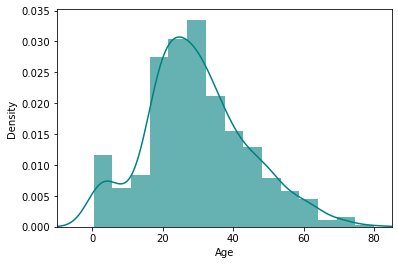

In [ ]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [ ]:
#how to impute using median
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True)

In [ ]:
#check column with NaN
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### CABIN

In [ ]:
#DROP this column
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
#check column with NaN
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### EMBARKED

In [ ]:
data.Embarked.dtypes

dtype('O')

In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

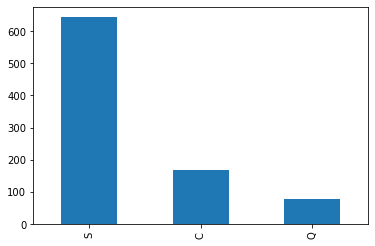

In [ ]:
data['Embarked'].value_counts().plot(kind='bar')

In [ ]:
#try to impute missing with major class. 
#fillna is used to replace missing value.
#idxmax highest value
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

In [ ]:
#CHECK REMAINING
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## HANDLING CATEGORICAL DATA

In [ ]:
#we spot PassengerID, Name and Ticket is just form of identifier.

In [ ]:
#check id
data.PassengerId.value_counts()

1      1
599    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
596    1
597    1
598    1
600    1
586    1
601    1
602    1
603    1
604    1
605    1
606    1
607    1
608    1
609    1
610    1
611    1
587    1
585    1
613    1
571    1
560    1
561    1
562    1
563    1
564    1
565    1
566    1
567    1
568    1
569    1
570    1
572    1
584    1
573    1
574    1
575    1
576    1
577    1
578    1
579    1
580    1
581    1
582    1
583    1
612    1
614    1
669    1
655    1
644    1
645    1
646    1
647    1
648    1
649    1
650    1
651    1
652    1
653    1
654    1
656    1
642    1
657    1
658    1
659    1
660    1
661    1
662    1
663    1
664    1
665    1
666    1
667    1
643    1
641    1
615    1
627    1
616    1
617    1
618    1
619    1
620    1
621    1
622    1
623    1
624    1
625    1
626    1
628    1
640    1
629    1
630    1
631    1
632    1
633    1
634    1
635    1
636    1
637    1
638    1
639    1
559    1
5

In [ ]:
#check name
data.Name.value_counts()

Jonkoff, Mr. Lalio                                                                    1
Collyer, Miss. Marjorie "Lottie"                                                      1
Clifford, Mr. George Quincy                                                           1
Dowdell, Miss. Elizabeth                                                              1
Sage, Mr. George John Jr                                                              1
Sharp, Mr. Percival James R                                                           1
Baclini, Mrs. Solomon (Latifa Qurban)                                                 1
Sage, Mr. Douglas Bullen                                                              1
Endres, Miss. Caroline Louise                                                         1
O'Brien, Mr. Thomas                                                                   1
Warren, Mrs. Frank Manley (Anna Sophia Atkinson)                                      1
Jussila, Mr. Eiriik             

In [ ]:
#check ticket
data.Ticket.value_counts()

347082                7
1601                  7
CA. 2343              7
CA 2144               6
347088                6
3101295               6
382652                5
S.O.C. 14879          5
17421                 4
19950                 4
113781                4
349909                4
LINE                  4
113760                4
PC 17757              4
2666                  4
4133                  4
347077                4
W./C. 6608            4
PC 17760              3
13502                 3
230080                3
PC 17572              3
363291                3
SC/Paris 2123         3
PC 17582              3
C.A. 31921            3
248727                3
239853                3
F.C.C. 13529          3
371110                3
C.A. 34651            3
PC 17755              3
345773                3
35273                 3
110152                3
29106                 3
24160                 3
110413                3
347742                3
36928                 2
PC 17593        

inference: passengerId and Name are identifier. We assume ticket refers to identifier under the same purchase

In [ ]:
data[data.Ticket=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S


In [ ]:
data[data.Ticket=='347088']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,S


inference: we see same ticket has same last name (family) and same fare. this inform whether the passenger travel alone or in group and how many are in the group. 

### EXTRACT NEW FEATURE

In [ ]:
#extract new feature from ticket
data['Group'] = data.groupby('Ticket')['Ticket'].transform('count')

In [ ]:
#Compare Group and total row to check
data[data.Ticket=='347088']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,S,6
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,S,6
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,S,6
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,S,6
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,S,6
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,S,6


In [ ]:
#extract TravelAlone to define whether a passenger travel alone or not. 1 travel alone, 0 in group.
data['TravelAlone']=np.where((data["Group"])>1, 0, 1)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S,1,1
5,6,0,3,"Moran, Mr. James",male,28.00,0,0,330877,8.4583,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C,2,0


In [ ]:
#we can now drop ticket, Name and set PassengerId as index
data.drop('Ticket', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.set_index('PassengerId', inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group,TravelAlone
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,1
2,1,1,female,38.0,1,0,71.2833,C,1,1
3,1,3,female,26.0,0,0,7.9250,S,1,1
4,1,1,female,35.0,1,0,53.1000,S,2,0
5,0,3,male,35.0,0,0,8.0500,S,1,1


### ENCODE CATEGORICAL FEATURE

In [ ]:
data.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Group            int64
TravelAlone      int32
dtype: object

#### ENCODE USING REPLACE

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group,TravelAlone
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,1
2,1,1,female,38.0,1,0,71.2833,C,1,1
3,1,3,female,26.0,0,0,7.9250,S,1,1
4,1,1,female,35.0,1,0,53.1000,S,2,0
5,0,3,male,35.0,0,0,8.0500,S,1,1


In [ ]:
#convert object to numerical category
data['Sex'] = data.Sex.replace('male',0).replace('female',1).astype(np.int)

In [ ]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#convert object to numerical category
data['Embarked'] = data.Embarked.replace('S',1).replace('C',2).replace('Q',3).astype(np.int)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group,TravelAlone
PassengerId,,,,,,,,,,
1,0,3,0,22.00,1,0,7.2500,1,1,1
2,1,1,1,38.00,1,0,71.2833,2,1,1
3,1,3,1,26.00,0,0,7.9250,1,1,1
4,1,1,1,35.00,1,0,53.1000,1,2,0
5,0,3,0,35.00,0,0,8.0500,1,1,1
6,0,3,0,28.00,0,0,8.4583,3,1,1
7,0,1,0,54.00,0,0,51.8625,1,1,1
8,0,3,0,2.00,3,1,21.0750,1,4,0
9,1,3,1,27.00,0,2,11.1333,1,3,0


In [ ]:
#data type to category
data.Pclass=data.Pclass.astype('category')
data.Embarked=data.Embarked.astype('category')
data.Sex=data.Sex.astype('category')
data.TravelAlone=data.TravelAlone.astype('category')
data.Survived=data.Survived.astype('category')

In [ ]:
data.dtypes

Survived       category
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
Group             int64
TravelAlone    category
dtype: object

## SELECTING RELEVANT FEATURES

In [ ]:
X=data.drop('Survived', axis=1)
y=data.Survived

In [ ]:
#USING FEATURE IMPORTANCE FROM RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

fi=RandomForestClassifier()
fi.fit(X,y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(fi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.262
Age,0.249
Fare,0.243
Pclass,0.078
Group,0.047
SibSp,0.040
Parch,0.032
Embarked,0.032
TravelAlone,0.015


<AxesSubplot:ylabel='feature'>

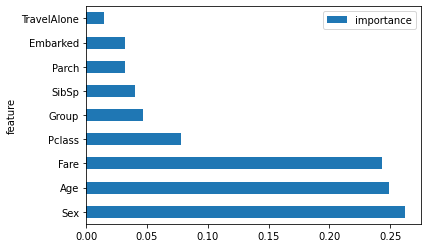

In [ ]:
importances.plot(kind='barh')

In [ ]:
#let's experiment with top feature as well
top_col=['Sex','Age','Fare','Pclass','Group','SibSp','Survived']

### UTILIZE get_dummies() TO ENCODE

In [ ]:
data.dtypes

Survived       category
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
Group             int64
TravelAlone    category
dtype: object

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group,TravelAlone
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,1,1
2,1,1,1,38.0,1,0,71.2833,2,1,1
3,1,3,1,26.0,0,0,7.9250,1,1,1
4,1,1,1,35.0,1,0,53.1000,1,2,0
5,0,3,0,35.0,0,0,8.0500,1,1,1


In [ ]:
data_enc = pd.get_dummies(data, columns=["Pclass","Embarked"])

In [ ]:
data_enc.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Group,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3
PassengerId,,,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,1,1,0,0,1,1,0,0
2,1,1,38.0,1,0,71.2833,1,1,1,0,0,0,1,0
3,1,1,26.0,0,0,7.9250,1,1,0,0,1,1,0,0
4,1,1,35.0,1,0,53.1000,2,0,1,0,0,1,0,0
5,0,0,35.0,0,0,8.0500,1,1,0,0,1,1,0,0


In [ ]:
#using top column
data_top=data[[c for c in data.columns if c in top_col]]

In [ ]:
data_top.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Group
PassengerId,,,,,,,
1,0,3,0,22.0,1,7.2500,1
2,1,1,1,38.0,1,71.2833,1
3,1,3,1,26.0,0,7.9250,1
4,1,1,1,35.0,1,53.1000,2
5,0,3,0,35.0,0,8.0500,1


In [ ]:
data_top_enc = pd.get_dummies(data_top, columns=["Pclass"])

In [ ]:
data_top_enc

,Survived,Sex,Age,SibSp,Fare,Group,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,0,0,22.00,1,7.2500,1,0,0,1
2,1,1,38.00,1,71.2833,1,1,0,0
3,1,1,26.00,0,7.9250,1,0,0,1
4,1,1,35.00,1,53.1000,2,1,0,0
5,0,0,35.00,0,8.0500,1,0,0,1
6,0,0,28.00,0,8.4583,1,0,0,1
7,0,0,54.00,0,51.8625,1,1,0,0
8,0,0,2.00,3,21.0750,4,0,0,1
9,1,1,27.00,0,11.1333,3,0,0,1


## SPLIT TRAIN-TEST

In [ ]:
X_top=data_top_enc.drop('Survived', axis=1)
y_top=data.Survived

X=data_enc.drop('Survived', axis=1)
y=data_enc.Survived

In [ ]:
from sklearn.model_selection import train_test_split

#training and testing split using all feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#training and testing split using feature from rf Feature Importance
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=1, stratify=y)


## NORMALIZATION WITH MINMAX SCALER

In [ ]:
data.describe()

,Age,SibSp,Parch,Fare,Group
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208,1.787879
std,13.019697,1.102743,0.806057,49.693429,1.361142
min,0.420000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,0.000000,0.000000,7.910400,1.000000
50%,28.000000,0.000000,0.000000,14.454200,1.000000
75%,35.000000,1.000000,0.000000,31.000000,2.000000
max,80.000000,8.000000,6.000000,512.329200,7.000000


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train_top=scaler.fit_transform(X_train_top)
X_test_top=scaler.transform(X_test_top)

In [ ]:
X_train

array([[1.        , 0.44278337, 0.125     , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.66023376, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.46316934, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.48355531, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.74177766, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.37483012, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_top = DecisionTreeClassifier()

model=model.fit(X_train,y_train)
model_top=model_top.fit(X_train_top,y_train_top)

In [ ]:
y_test_pred=model.predict(X_test)
y_test_pred_top=model_top.predict(X_test_top)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted All Feature': y_test_pred.flatten(),'Predicted Top': y_test_pred_top.flatten()})
df

,Actual,Predicted All Feature,Predicted Top
PassengerId,,,
434,0,0,0
222,0,0,0
218,0,0,0
377,1,1,1
448,1,1,1
627,0,0,0
207,0,0,0
360,1,1,1
200,0,1,1


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

report = classification_report(y_test_pred, y_test)
print("Result using All Feature")
print(report)

Result using All Feature
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       166
           1       0.68      0.69      0.68       102

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [ ]:
report = classification_report(y_test_pred_top, y_test_top)
print("Result using Top Feature")
print(report)

Result using Top Feature
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       170
           1       0.66      0.69      0.68        98

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



# MODEL EVALUATION AND HYPERPARAMETER TUNING

## utilize different ratio of train:test

In [ ]:
#training and testing split using feature from rf Feature Importance
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=1, stratify=y)
X_train_top=scaler.fit_transform(X_train_top)
X_test_top=scaler.transform(X_test_top)
model_top=model_top.fit(X_train_top,y_train_top)
y_test_pred_top=model_top.predict(X_test_top)
report = classification_report(y_test_pred_top, y_test_top)
print("Result using Top Feature with Larger Training Set")
print(report)

Result using Top Feature with Larger Training Set
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       114
           1       0.68      0.72      0.70        65

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.78      0.78       179



## cross-validation

In [ ]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
def acc_score(model):
    return np.mean(cross_val_score(model,X_train_top,y_train_top,cv=k_fold,scoring="accuracy"))

In [ ]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
dt.fit(X_train_top,y_train_top)

print("Accuracy: " + str(acc_score(dt)))

Accuracy: 0.7696739879838471


## HYPERPARAMETER TUNING

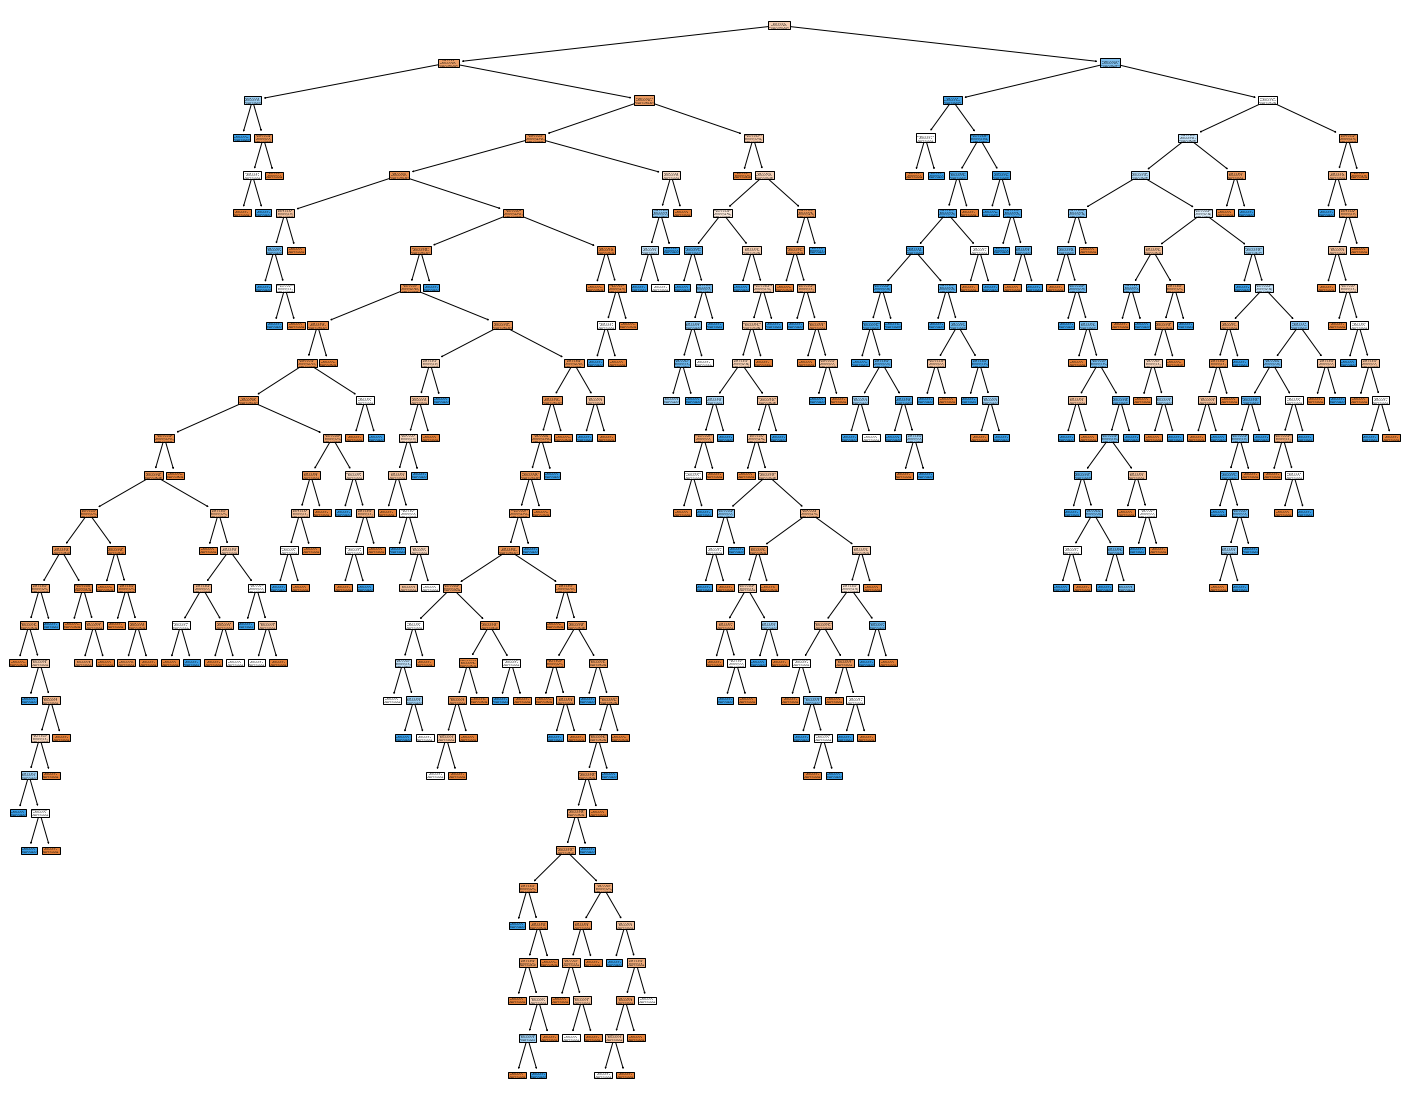

In [ ]:
#FIRST LET'S VISUALIZE THE TREE MODEL'S DECISION MAKING BASED ON DATA PROVIDED
dt=DecisionTreeClassifier()
dt.fit(X_top, y_top)
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X_top.columns,
                   class_names=['Survive', 'Dead'],
                   filled=True)

In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X_top.columns,
                       class_names=['Survive', 'Dead'],
                       filled=True)

## FINDING OPTIMAL PARAMETER FOR TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train_top, y_train_top)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(1,"mean_test_score").params

In [ ]:
dt_best=grid_search.best_estimator_

In [ ]:
get_dt_graph(dt_best)

In [ ]:
#PREDICT USING BEST PARAMETER
y_pred_top_best=dt_best.predict(X_test_top)

In [ ]:
df_bp = pd.DataFrame({'Actual': y_test_top, 'Predicted': y_pred_top_best.flatten()})
df_bp

In [ ]:
report = classification_report(y_pred_top_best, y_test_top)
print("Result using Top Feature with Best Parameter")
print(report)